In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")


In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
sdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [5]:
sdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


## Visualize the Dataset

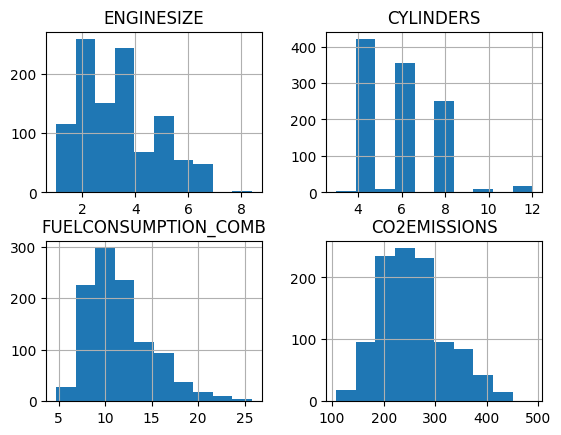

In [6]:
sdf.hist()
plt.show()

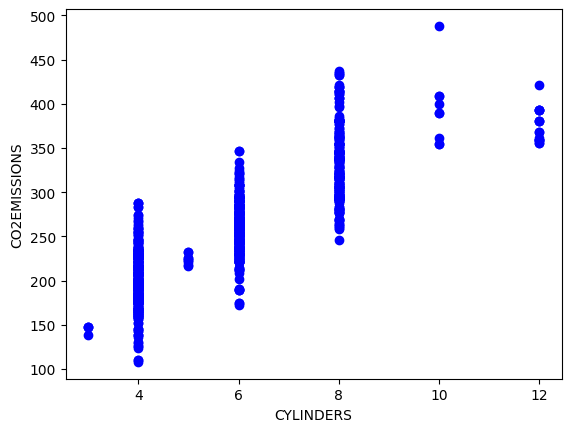

In [7]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS,color="blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

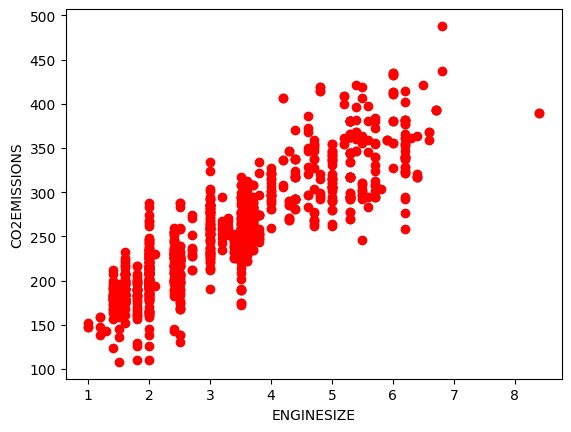

In [8]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

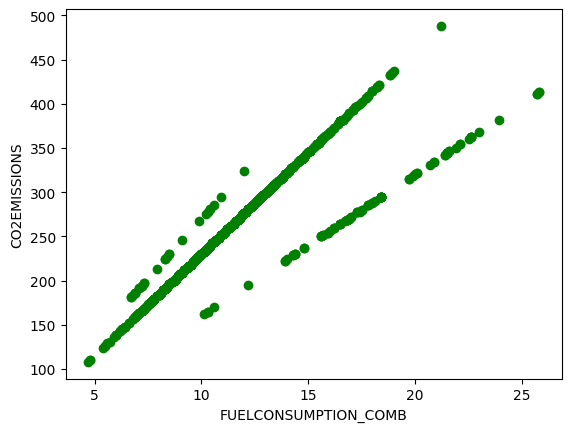

In [9]:
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS,color="green")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Train Test Split

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = sdf[msk]
test = sdf[~msk]

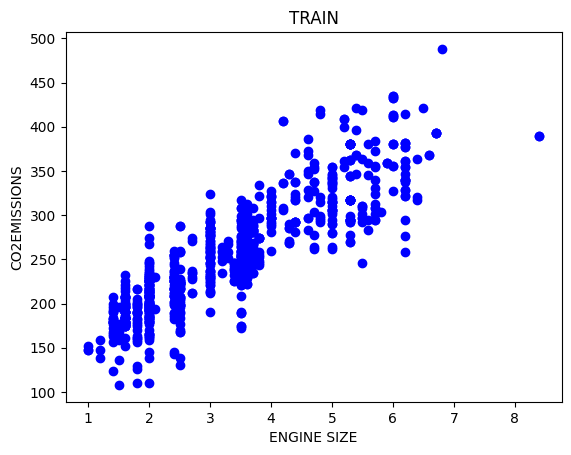

In [11]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("TRAIN")
plt.show()

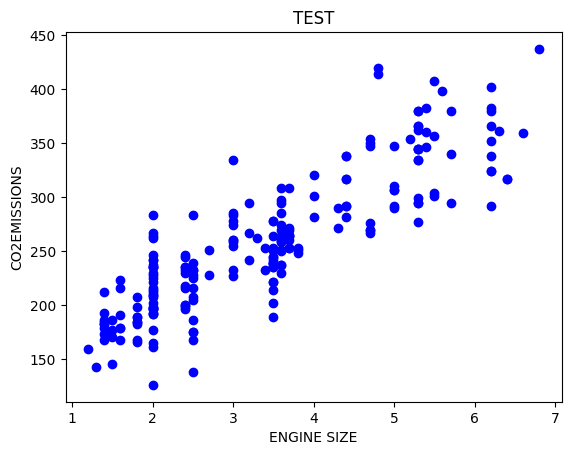

In [12]:
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS,color="blue")
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("TEST")
plt.show()

## Build the Linear Regression Model

In [13]:
lreg = linear_model.LinearRegression()


In [46]:
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

In [47]:
lreg.fit(x_train,y_train)

LinearRegression()

In [48]:
print("coefficient",lreg.coef_)
print("intercept",lreg.intercept_)

coefficient [[39.415148]]
intercept [124.39839772]


Text(0, 0.5, 'CO2EMISSION')

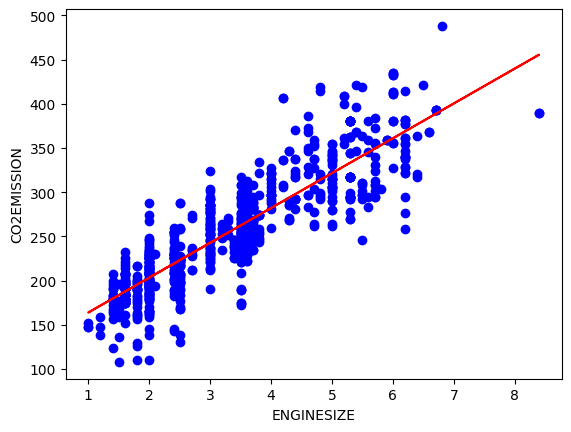

In [49]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
plt.plot(x_train,lreg.coef_[0][0]*x_train + lreg.intercept_[0],'-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")
# plt.show()

In [50]:
score = lreg.score(x_train,y_train)
score

0.767607383343898

In [51]:
pred = lreg.predict(x_test)
pred

array([[262.35141571],
       [309.6495933 ],
       [203.22869371],
       [242.64384171],
       [242.64384171],
       [372.7138301 ],
       [203.22869371],
       [203.22869371],
       [329.3571673 ],
       [282.05898971],
       [203.22869371],
       [203.22869371],
       [282.05898971],
       [392.42140409],
       [203.22869371],
       [203.22869371],
       [203.22869371],
       [242.64384171],
       [297.8250489 ],
       [297.8250489 ],
       [297.8250489 ],
       [297.8250489 ],
       [297.8250489 ],
       [297.8250489 ],
       [297.8250489 ],
       [242.64384171],
       [242.64384171],
       [179.57960492],
       [203.22869371],
       [203.22869371],
       [266.29293051],
       [266.29293051],
       [242.64384171],
       [368.7723153 ],
       [368.7723153 ],
       [368.7723153 ],
       [195.34566411],
       [203.22869371],
       [333.2986821 ],
       [333.2986821 ],
       [333.2986821 ],
       [333.2986821 ],
       [333.2986821 ],
       [218

In [53]:
from sklearn.metrics import r2_score

In [59]:
r2 = r2_score(pred,y_test)

In [60]:
r2

0.6900793509714997

## Using Cross-Validation to improve the model (K-Fold)

In [61]:
from sklearn.model_selection import KFold, cross_val_score

In [105]:
X = sdf[['ENGINESIZE']]
Y = sdf['CO2EMISSIONS']

In [106]:
k = 3

In [107]:
cross_val = KFold(n_splits=k,shuffle=True)

In [108]:
cross_score = cross_val_score(lreg,X,Y,cv=cross_val)

In [109]:
cross_score

array([0.7384241 , 0.75498602, 0.78972288])

In [110]:
np.mean(cross_score)

0.7610443325913733